In [1]:
'''
典型的高维数据回归问题
X：房源信息
Y：房价
train.csv 用于训练的数据
test.csv  用于测试的数据集

1、检测元数据集，看一下数据的形式

'''
import numpy as np
import pandas as pd


In [6]:
'''
读入数据，一般源数据index 
'''
train_df = pd.read_csv('input/train.csv', index_col=0)
test_df = pd.read_csv('input/test.csv', index_col=0)

In [10]:
train_df.head()
'''
NaN 
处理英文单词 变为数字的表达形式
index 噪声数据，对结果值没有意义
非标准数据

将数据转换为 数字的表达形式
2、将训练集和测试集 进行合并

将数据合起来只是为了用DF进行数据预处理的时候更加方便

先看当前特征有几种类型，

训练集会告诉我们房子卖了多少
测试集是不会告诉我们 
'''


'\nNaN \n处理英文单词 变为数字的表达形式\nindex 噪声数据，对结果值没有意义\n非标准数据\n\n将数据转换为 数字的表达形式\n2、将训练集和测试集 进行合并\n\n将数据合起来只是为了用DF进行数据预处理的时候更加方便\n\n先看当前特征有几种类型，\n\n训练集会告诉我们房子卖了多少\n测试集是不会告诉我们 \n'

'\nY 本身不平滑，把label 正态化\nlog是把label 平滑化 正态化\n\n如果现在把数据给平滑化后，那么最后计算结果的时候要把预测到的平滑数据变回去\n\nlog1p log(x+1) 避免了复值的问题\n\n如果这里把数据平滑化后，最后计算结果的时候 要把预测的平滑数据变回去\n\n怎么平滑过来的就要怎么平滑过去\nlog1p() 就需要expm1()\nlog() 就需要 exp()\n\n'

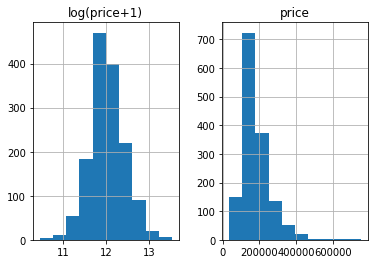

In [11]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"],"log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()
'''
Y 本身不平滑，把label 正态化
log是把label 平滑化 正态化

如果现在把数据给平滑化后，那么最后计算结果的时候要把预测到的平滑数据变回去

log1p log(x+1) 避免了复值的问题

如果这里把数据平滑化后，最后计算结果的时候 要把预测的平滑数据变回去

怎么平滑过来的就要怎么平滑过去
log1p() 就需要expm1()
log() 就需要 exp()

'''

In [12]:
y_train = np.log1p(train_df.pop('SalePrice')) #从原数据中pop 删除掉一列，返回y_train 就是那一列 

In [13]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [14]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape
'''
针对回归问题 的标签：

回归问题 需要做平滑性，因为最终预测的是一个数值，如果一开始就是偏的，那么结果也会有影响

分类问题不需要做平滑性处理
'''

'\n针对回归问题 的标签：\n\n回归问题 需要做平滑性，因为最终预测的是一个数值，如果一开始就是偏的，那么结果也会有影响\n\n分类问题不需要做平滑性处理\n'

In [23]:
'''
变量转化 特征工程 
就是把一些不规范的数据，空的数据，处理成数字化表达的形式

这一步没有标准的处理方式，
根据情景 根据数据 进行不同的处理

正确化变量属性


拿到数据之后 要先读懂 数据中每个样本特征所代表的意义，以及
样本特征之间的关联

注意：有些特征不会影响到结果，特征的数值大小只是表达一个类似标签的效果
例如：房子的名称20 30 40 号，只是一个普普通通的数据，但如果把它当做很重要的数据放进算法中
只会影响最终结果

有的数字不是数字：而是英文字母，而是英文意思，不是数值
'''
all_df['MSSubClass'].dtypes
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [24]:
'''
字符是不能被矩阵形式处理的

One_hot 一共有十维的向量

若第一个位置是category，那么第一个位置为1 ，其余的位置为0
若第三个位置是category，那么第三个位置为1，其余的位置为0

pandas 自带的get_dummies(),可以一键做到One-hot

'''
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()
#把分类数据转换为数字化数据的一种方式
#下面列表中MSSubClass 被分成12个column,每一个代表一个category，是就是1，不是就是0
#同理，我们把所有的category数据，都用这种方式

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
#处理完毕category的变量，继续处理numerical变量，因为有些数据是缺失的
#查询哪些特征的数据是丢失的

all_dummy_df.isnull().sum().sort_values(ascending=False).head()
#结果显示 缺失最多的column是LotFrontage 

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
dtype: int64

In [29]:
'''
处理缺失信息时 要注意数据集里的描述，理解缺失代表着什么

一般情况用平均值填满缺值

'''
#计算每个columns的平均值
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [31]:
#将所有的column为空的 都使用均值 填充上
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [32]:
#检查是否有空缺值
all_dummy_df.isnull().sum().sum()

0

In [34]:
'''
标准化numerical 数据

'''

#看那些数据是numerical 数字化的数据
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

'''
需要进行标准化的列
计算标准分布：（X-X'）/s
使数据点更加平滑

哪些用平均值 哪些用0，哪些用最高值，是根据情景来确定的
例如房间面积，房间面积不可能为零，就要取平均值

'''

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [36]:
#取平均值
numeric_col_means = all_dummy_df.loc[:,numeric_cols].mean()
#std
numeric_col_std = all_dummy_df.loc[:,numeric_cols].std()

all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols]-numeric_col_means/numeric_col_std)
all_dummy_df

'''
以上都是在做 特征工程的 步骤
经过一系列的处理 X Y最终都变为平滑干净的数字化的表达形式
接下来开始建立模型

重要一点：记得把处理过后数据集 平滑为：训练集和测试集，不能进行打乱


'''


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,61.748092,8448.710775,2.681348,0.000967,1937.92179,1908.033417,195.427848,705.030974,-0.29308,148.723976,...,0,0,0,1,0,0,0,0,1,0
2,76.748092,9598.710775,1.681348,3.000967,1910.92179,1881.033417,-0.572152,977.030974,-0.29308,282.723976,...,0,0,0,1,0,0,0,0,1,0
3,64.748092,11248.710775,2.681348,0.000967,1935.92179,1907.033417,161.427848,485.030974,-0.29308,432.723976,...,0,0,0,1,0,0,0,0,1,0
4,56.748092,9548.710775,2.681348,0.000967,1849.92179,1875.033417,-0.572152,215.030974,-0.29308,538.723976,...,0,0,0,1,1,0,0,0,0,0
5,80.748092,14258.710775,3.681348,0.000967,1934.92179,1905.033417,349.427848,654.030974,-0.29308,488.723976,...,0,0,0,1,0,0,0,0,1,0
6,81.748092,14113.710775,0.681348,0.000967,1927.92179,1900.033417,-0.572152,731.030974,-0.29308,62.723976,...,0,0,0,1,0,0,0,0,1,0
7,71.748092,10082.710775,3.681348,0.000967,1938.92179,1910.033417,185.427848,1368.030974,-0.29308,315.723976,...,0,0,0,1,0,0,0,0,1,0
8,66.053887,10380.710775,2.681348,1.000967,1907.92179,1878.033417,239.427848,858.030974,31.70692,214.723976,...,0,0,0,1,0,0,0,0,1,0
9,47.748092,6118.710775,2.681348,0.000967,1865.92179,1855.033417,-0.572152,-0.969026,-0.29308,950.723976,...,0,0,0,1,1,0,0,0,0,0


In [38]:
train_df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

In [39]:
test_df.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [42]:
'''
把数据集分回 训练/测试集
'''

#dummy 变为了 0 1的格式
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [46]:
dummy_train_df.shape

(1460, 303)

In [45]:
dummy_test_df.shape

(1459, 303)

In [52]:
'''
Ridge Regression

对于的多因子的数据集
这种模型可以方便的把所有的var(特征量)都无脑的放进去
'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#将DataFrame的值 转换为 numpy 的数据，处理数据 比较方便
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [53]:
'''
通过交叉验证的方式
sklearn自带的cross validation 的方法来测试模型
'''
#步长
alphas = np.logspace(-3,2,50)
#print(alphas)
#存入每次交叉验证的结果
test_scores = []

for alpha in alphas:
    #传统就是 用clf 简称我们的回归器和分类器
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, 
                                          X_train, 
                                          y_train, 
                                          cv=10,
                                         scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

'''
交叉验证，是交叉我们的训练集
存下所有的CV值，看看哪个alpha值更合适（这也就是调试参数）
'''

Text(0.5,1,'Alpha vs CV Error')

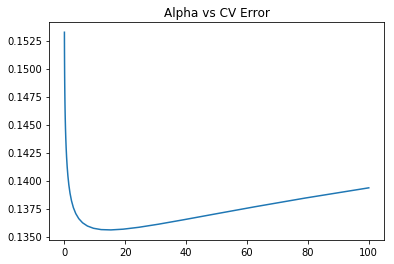

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")